# Part 0
Oceana Zhu, oz2060

# Part 1

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
#Question 1
def predict_tumor_class(normal_nucleoli, cell_size):
    if normal_nucleoli > 3:
        predicted_class = 1
    elif normal_nucleoli <= 3 and cell_size < 3: 
        predicted_class = 1
    else:
        predicted_class = 0
    return predicted_class

In [5]:
#Question 2
normal_nucleoli = 4
cell_size = 4
predict_tumor_class(normal_nucleoli, cell_size)

1

In [6]:
normal_nucleoli = 1
cell_size = 5
predict_tumor_class(normal_nucleoli, cell_size)

0

In [7]:
#The function works!

In [8]:
#Question 3
cancer = pd.read_csv('shared/datasets/cancer.csv')

X = cancer.drop('Class', axis=1)
y = cancer['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

predictions = pd.DataFrame(columns=['y_predicted', 'y_actual', 'error', 'tp', 'fp', 'tn', 'fn'])

In [9]:
#Question 4
for i in range(len(X_test)):
    normal_nucleoli = X_test.iloc[i]['Normal Nucleoli']
    cell_size = X_test.iloc[i]['Uniformity of Cell Size']
    
    predicted_class = predict_tumor_class(normal_nucleoli, cell_size)
    
    predicted_df = pd.DataFrame({'y_predicted': [predicted_class]})
    
    predictions = pd.concat([predictions, predicted_df], ignore_index=True)
    
    predictions.at[i, 'y_actual'] = y_test.iloc[i]
    
    actual_class = y_test.iloc[i]
  
    if predicted_class == actual_class:
        predictions.at[i, 'error'] = 0
        if actual_class == 1:
            predictions.at[i, 'tp'] = 1
            predictions.at[i, 'fp'] = 0
            predictions.at[i, 'tn'] = 0
            predictions.at[i, 'fn'] = 0
        else:
            predictions.at[i, 'tp'] = 0
            predictions.at[i, 'fp'] = 0
            predictions.at[i, 'tn'] = 1
            predictions.at[i, 'fn'] = 0
    else:
        predictions.at[i, 'error'] = 1
        if predicted_class == 1 and actual_class == 0:
            predictions.at[i, 'tp'] = 0
            predictions.at[i, 'fp'] = 1
            predictions.at[i, 'tn'] = 0
            predictions.at[i, 'fn'] = 0
        else:
            predictions.at[i, 'tp'] = 0
            predictions.at[i, 'fp'] = 0
            predictions.at[i, 'tn'] = 0
            predictions.at[i, 'fn'] = 1

In [10]:
#Question 5
correct_predictions = len(predictions[predictions['y_predicted'] == predictions['y_actual']])
accuracy = correct_predictions / len(predictions) * 100
print(accuracy)

27.73722627737226


In [11]:
# I don't think that my classifier is very good because the accuracy score is only 27.73722627737226%. I think that the performance of my classifer could be improved with the incluson of more branches in my decision tree, which would allow the decision tree predictions to account for other factors that would influence tumor class. 

In [12]:
#Question 6
precision = predictions['tp'].sum() / (predictions['tp'].sum() + predictions['fp'].sum())
tpr = predictions['tp'].sum() / (predictions['tp'].sum() + predictions['fn'].sum())
tnr = predictions['tn'].sum() / (predictions['tn'].sum() + predictions['fp'].sum())

print("Accuracy:", accuracy)
print("Precision:", precision)
print("True Positive Rate:", tpr)
print("True Negative Rate:", tnr)


Accuracy: 27.73722627737226
Precision: 0.2719298245614035
True Positive Rate: 0.6595744680851063
True Negative Rate: 0.07777777777777778


In [ ]:
#Accuracy: only 27.74% were classified correctly of all the instances. Precision: only 27.19% were truly positive of all the insstances. True Positive Rate: the model correctly identified 65.95% of all positively identified as positive. True Negative Rate: the model correctly identified only 7.78% of negative instances as negative. 

In [29]:
#Question 7
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score

k_values = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

tpr_scores = []
accuracy_scores = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_predicted_knn = knn_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_predicted_knn)
    accuracy_scores.append(accuracy)

    tpr = recall_score(y_test, y_predicted_knn)
    tpr_scores.append(tpr)

best_k = k_values[tpr_scores.index(max(tpr_scores))]

print('Accuracy:', accuracy_scores[tpr_scores.index(max(tpr_scores))])
print('True Positive Rate:', max(tpr_scores))

Accuracy: 0.5985401459854015
True Positive Rate: 0.2978723404255319


In [ ]:
#I think that the classifier is moderately good as it has an accuracy of .5985 and of all the actually positve instances, it correctly predicted about 29.787% of them. 

In [26]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=1e5)
lr_model.fit(X_train, y_train)
y_predicted_lr = lr_model.predict(X_test)
y_predicted_prob_lr = lr_model.predict_proba(X_test)[:,1]
threshold = 0.32
y_predicted_lr = (y_predicted_prob_lr >= threshold).astype(int)

predictions_lr = pd.DataFrame()
predictions_lr['y_predicted'] = y_predicted_lr
predictions_lr['y_actual'] = y_test
predictions_lr['error'] = y_predicted_lr - y_test
predictions_lr['tp'] = ((predictions_lr['y_predicted'] == 1) & (predictions_lr['y_actual'] == 1)).tolist()
predictions_lr['fp'] = ((predictions_lr['y_predicted'] == 1) & (predictions_lr['y_actual'] == 0)).tolist()
predictions_lr['tn'] = ((predictions_lr['y_predicted'] == 0) & (predictions_lr['y_actual'] == 0)).astype(int)
predictions_lr['fn'] = ((predictions_lr['y_predicted'] == 0) & (predictions_lr['y_actual'] == 1)).astype(int)

correct_predictions_lr = len(predictions_lr[predictions_lr['y_predicted'] == predictions_lr['y_actual']])
accuracy_lr = correct_predictions_lr / len(predictions_lr) * 100

predictions_lr['y_predicted'] = predictions_lr['y_predicted'].astype(bool)
predictions_lr['y_actual'] = predictions_lr['y_actual'].astype(bool)

tpr_lr = sum(predictions_lr['tp']) / (sum(predictions_lr['tp']) + sum(predictions_lr['fn'])) * 100

print('True Positive Rate:', tpr_lr)
print('Accuracy:', accuracy_lr)

Logistic Regression True Positive Rate: 87.5
Accuracy: 12.408759124087592


In [ ]:
#I think that the classifier is somewhat good as it has an accuracy of .1241 and of all the actually positve instances, it correctly predicted about 87.5% of them. 

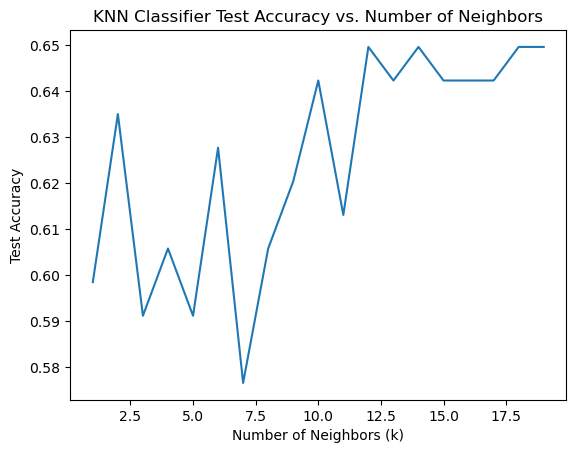

In [27]:
#Question 8
import matplotlib.pyplot as plt
k_values = range(1, 20) 
test_accuracy = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)

    knn_model.fit(X_train, y_train)

    y_predicted_knn = knn_model.predict(X_test)

    accuracy_knn = knn_model.score(X_test, y_test)
    test_accuracy.append(accuracy_knn)

plt.plot(k_values, test_accuracy)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Test Accuracy')
plt.title('KNN Classifier Test Accuracy vs. Number of Neighbors')
plt.show()

In [ ]:
#The performance of the classifier is moderate, as it reaches an accuracy of around .65. As the k value is varied, the accuracy varies, but it eventually goes up to an accuracy of about .65 and stays there. 

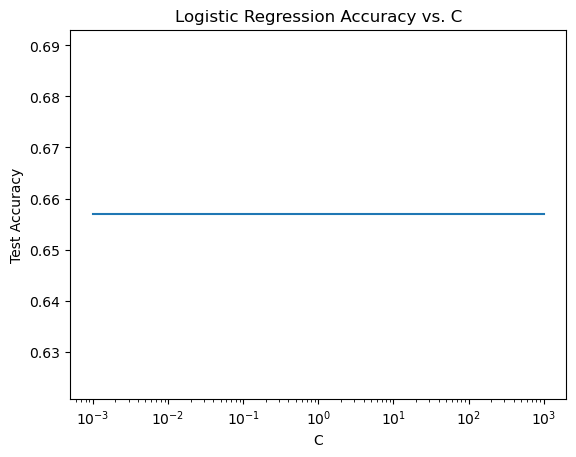

In [28]:
#Question 9
C_values = np.logspace(-3, 3, num=7)
test_accuracies = []

for C in C_values:
    lr = LogisticRegression(C=C, max_iter=10000)
    lr.fit(X_train, y_train)
    test_accuracy = lr.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

plt.plot(C_values, test_accuracies)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Test Accuracy')
plt.title('Logistic Regression Accuracy vs. C')
plt.show()

In [ ]:
#The performance of this classifier is moderately good becuase the accuaracy is around .654. However as C is being varied, the test accuracy remains stagnant. 